In [63]:
from warnings import filterwarnings
filterwarnings('ignore')

In [64]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [65]:
X, y = make_blobs(n_samples=1000, centers=3, random_state=42, n_features=3)

In [66]:
X

array([[-1.62313406,  8.87720831,  4.84001326],
       [ 1.71267112, -5.15279335, -6.78367587],
       [-1.94449656,  8.37968109,  5.63563107],
       ...,
       [ 2.36525421, -7.06852388, -6.32703632],
       [-9.94151051,  7.01098018,  0.36757196],
       [-1.73549721,  8.47614447,  3.29320074]])

In [67]:
y

array([0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1,
       0, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0,
       0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0,
       1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2,
       0, 1, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2,
       0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1,
       2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1,
       1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2,
       0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0,

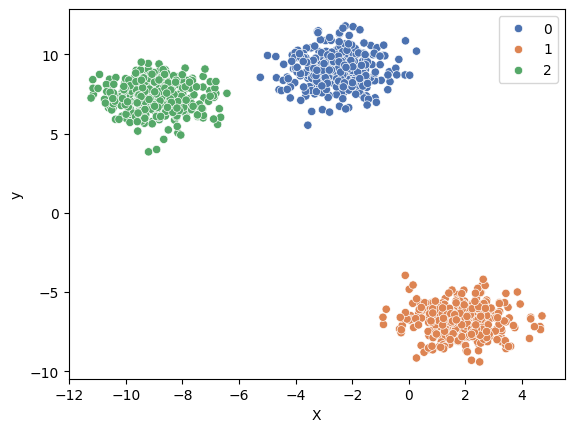

In [68]:
sns.scatterplot(x=X[:,0],
                y=X[:,1],
                hue= y,
                palette='deep')

plt.xlabel('X')
plt.ylabel('y')
plt.show()

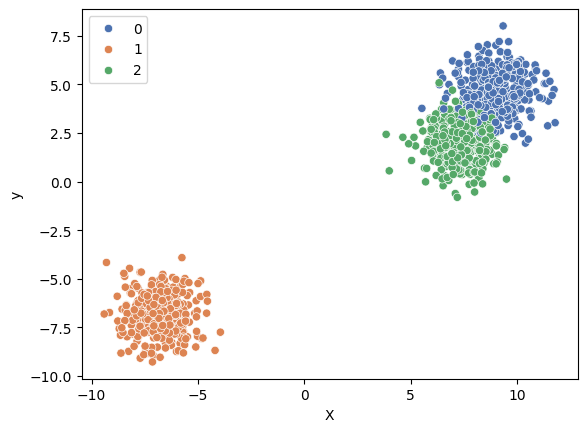

In [69]:
sns.scatterplot(x=X[:,1],
                y=X[:,2],
                hue= y,
                palette='deep')

plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [70]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y , test_size=0.2, random_state=42)

In [71]:
Xtrain.shape, Xtest.shape

((800, 3), (200, 3))

In [72]:
from sklearn.cluster import KMeans

# Manual Elbow method by Elbow Method
wcss = []

for k in range(2,15):
    model = KMeans(n_clusters=k, init='k-means++')
    model.fit(Xtrain)
    wcss.append(model.inertia_)

In [73]:
wcss

[9254.771848586688,
 2376.8261600266333,
 2169.5701890473683,
 1982.9446330095238,
 1802.5068856169444,
 1679.5956687033777,
 1547.8867700924745,
 1433.2792049714114,
 1342.1376708019725,
 1249.7598729121971,
 1173.8770126866402,
 1130.0327801090107,
 1070.2690606527563]

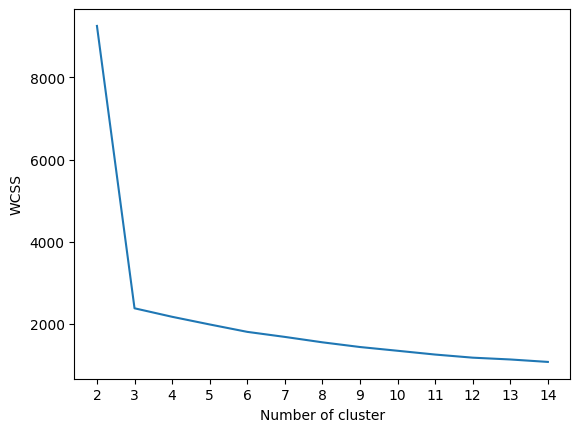

In [75]:
plt.plot(range(2,15),wcss)
plt.xticks(range(2,15))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [77]:
km_model = KMeans(n_clusters=3, init='k-means++')

y_Label = km_model.fit_predict(Xtrain)

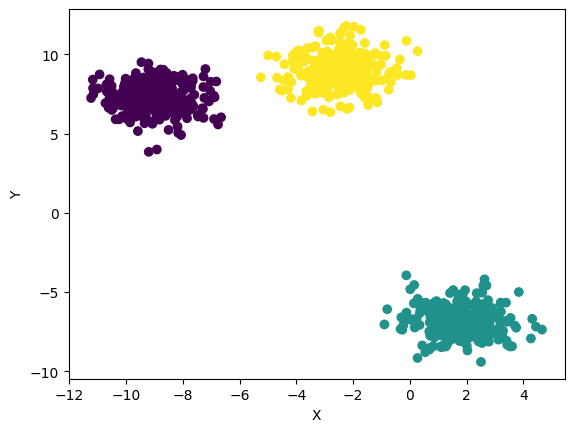

In [84]:
plt.scatter(Xtrain[:,0],
            Xtrain[:,1],
            c=y_Label)

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

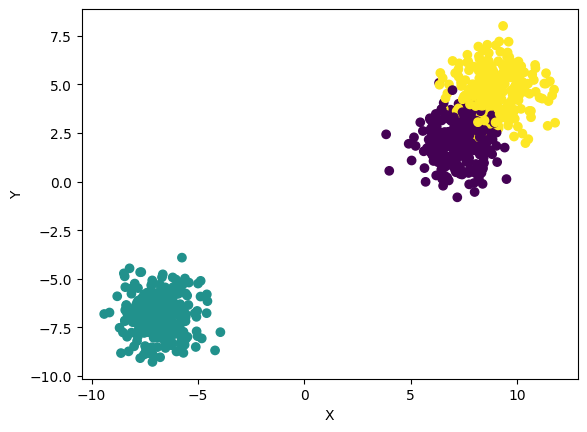

In [85]:
plt.scatter(Xtrain[:,1],
            Xtrain[:,2],
            c=y_Label)

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Automate

In [91]:
from kneed import KneeLocator

kl = KneeLocator(range(2,15), wcss, curve='convex', direction='decreasing')

kl.elbow

3

In [92]:
from sklearn.metrics import silhouette_score

In [93]:
silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(Xtrain)
    
    score = silhouette_score(Xtrain, kmeans.labels_)
    silhouette.append(score)

In [94]:
silhouette

[0.8007853406372302,
 0.7559883923235019,
 0.6009775275910472,
 0.3807642712439804,
 0.2272516925101545,
 0.23427195966444547,
 0.23034402571653317,
 0.22804149246538385,
 0.2357649937326213]